<a href="https://colab.research.google.com/github/jishnu1711/crowd-detection-part2/blob/main/crowd_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is for all the dependencies and libraries

In [1]:
# Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
Setup complete. Using torch 2.6.0+cu124 (Tesla T4)


this is to import annotated data set from robo flow

In [2]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2CF5NR1QQDNvxFwkmSNJ")
project = rf.workspace("spoorthimodel").project("crowd-detection-part2")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crowd-detection-part2-1 in yolov5pytorch:: 100%|██████████| 1212/1212 [00:00<00:00, 7807.59it/s]


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

this is to test the train the model

In [4]:
!python train.py --img 416 --batch 16 --epochs 150 --data crowd-detection-part2-1/data.yaml --weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
     65/149      2.14G    0.03656    0.04044          0        237        416:  44% 12/27 [00:02<00:03,  4.64it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     65/149      2.14G    0.03634    0.04008          0        227        416:  48% 13/27 [00:02<00:03,  4.37it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     65/149      2.14G    0.03628    0.03958          0        221        416:  52% 14/27 [00:03<00:02,  4.51it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     65/149      2.14G    0.03602    

this is to import all the test photo frames for testing

In [5]:
import os
from google.colab import files
import shutil

# Path to your test folder
test_folder = '/content/yolov5/Crowd-detection-3/test'

# Create the folder if it doesn't exist
os.makedirs(test_folder, exist_ok=True)

# Upload files from local device
uploaded = files.upload()

# Move uploaded files to the test folder
for file_name in uploaded.keys():
    shutil.move(file_name, os.path.join(test_folder, file_name))
    print(f"✅ Moved {file_name} to {test_folder}")


Saving test1.jpeg to test1.jpeg
Saving test2.jpeg to test2.jpeg
Saving test3.jpeg to test3.jpeg
✅ Moved test1.jpeg to /content/yolov5/Crowd-detection-3/test
✅ Moved test2.jpeg to /content/yolov5/Crowd-detection-3/test
✅ Moved test3.jpeg to /content/yolov5/Crowd-detection-3/test


In [6]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --source /content/yolov5/Crowd-detection-3/test --save-txt


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/Crowd-detection-3/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/Crowd-detection-3/test/test1.jpeg: 320x416 4 persons, 31.0ms
image 2/3 /content/yolov5/Crowd-detection-3/test/test2.jpeg: 320x416 2 persons, 6.3ms
image 3/3 /content/yolov5/Crowd-detection-3/test/test3.jpeg: 416x320 7 persons, 30.0ms
Speed: 0.4ms pre-pro

this is for counting the numebr of people from in the given test dataset frames

In [11]:
import os

# Path to labels generated after detection
labels_path = '/content/yolov5/runs/detect/exp/labels'

# Dictionary to store counts
person_counts = {}

# Iterate through label files
for label_file in os.listdir(labels_path):
    if label_file.endswith('.txt'):
        file_path = os.path.join(labels_path, label_file)

        with open(file_path, 'r') as f:
            lines = f.readlines()
            count = len(lines)
            person_counts[label_file] = count

# Print people count per frame
for file, count in person_counts.items():
    print(f"{file}: {count} person(s) detected")


test1.txt: 4 person(s) detected
test3.txt: 7 person(s) detected
test2.txt: 2 person(s) detected


this if for importing videos

In [13]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --source /content/yolov5/Crowd-detection-3/test/ --save-txt
!mv testvideo1.mp4 /content/yolov5/Crowd-detection-3/test/

In [14]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --source /content/yolov5/Crowd-detection-3/test/testvideo1.mp4 --save-txt


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/Crowd-detection-3/test/testvideo1.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/408) /content/yolov5/Crowd-detection-3/test/testvideo1.mp4: 256x416 17 persons, 31.0ms
video 1/1 (2/408) /content/yolov5/Crowd-detection-3/test/testvideo1.mp4: 256x416 16 persons, 11.1ms
video 1/1 (3/408) /content/yolov5/Crowd-detection-3/test/testvide

this is for coutning the number of people in each frame

In [16]:
import os

labels_path = '/content/yolov5/runs/detect/exp3/labels'

# Crowd density classification function
def classify_density(count):
    if count <= 10:
        return 'Low'
    elif count <= 25:
        return 'Medium'
    else:
        return 'High'

frame_densities = {}

for file in sorted(os.listdir(labels_path)):
    if file.endswith('.txt'):
        with open(os.path.join(labels_path, file), 'r') as f:
            count = 0
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5 and parts[0] == '0':  # class 0 = person
                    count += 1
            frame_densities[file] = {
                "count": count,
                "density": classify_density(count)
            }

# Print results
print("🎥 Crowd Density per Frame:\n")
for frame, data in frame_densities.items():
    print(f"{frame}: {data['count']} person(s) → {data['density']} Density")


🎥 Crowd Density per Frame:

testvideo1_1.txt: 17 person(s) → Medium Density
testvideo1_10.txt: 16 person(s) → Medium Density
testvideo1_100.txt: 16 person(s) → Medium Density
testvideo1_101.txt: 15 person(s) → Medium Density
testvideo1_102.txt: 16 person(s) → Medium Density
testvideo1_103.txt: 15 person(s) → Medium Density
testvideo1_104.txt: 14 person(s) → Medium Density
testvideo1_105.txt: 14 person(s) → Medium Density
testvideo1_106.txt: 13 person(s) → Medium Density
testvideo1_107.txt: 14 person(s) → Medium Density
testvideo1_108.txt: 14 person(s) → Medium Density
testvideo1_109.txt: 14 person(s) → Medium Density
testvideo1_11.txt: 17 person(s) → Medium Density
testvideo1_110.txt: 13 person(s) → Medium Density
testvideo1_111.txt: 14 person(s) → Medium Density
testvideo1_112.txt: 12 person(s) → Medium Density
testvideo1_113.txt: 13 person(s) → Medium Density
testvideo1_114.txt: 14 person(s) → Medium Density
testvideo1_115.txt: 14 person(s) → Medium Density
testvideo1_116.txt: 14 per

this is for plotting the result of the annotated output.

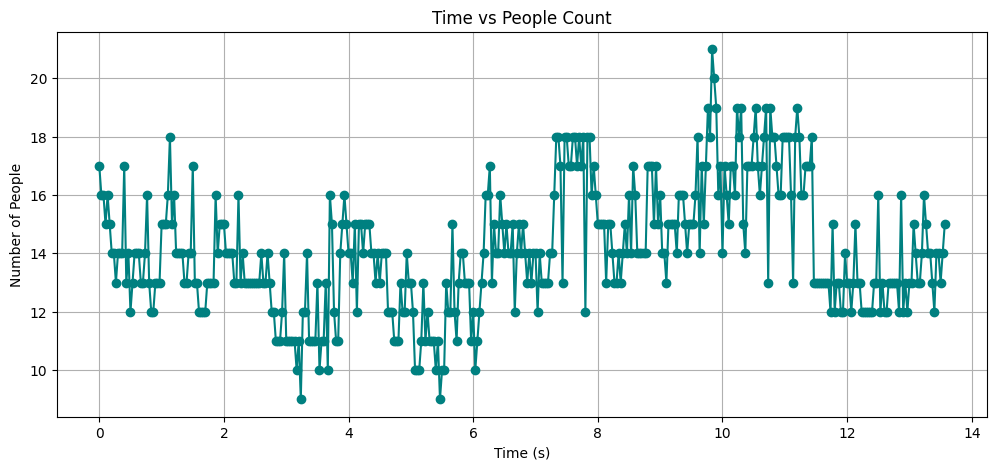

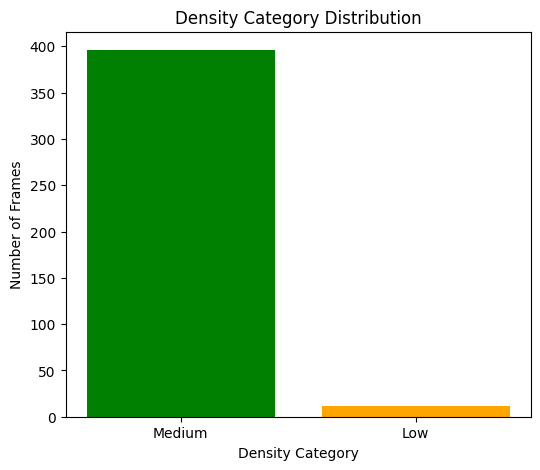

In [17]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# === CONFIG ===
labels_path = '/content/yolov5/runs/detect/exp3/labels'  # change if needed
frame_rate = 30  # frames per second (change if needed)

# === Helper: Classify Density ===
def classify_density(count):
    if count <= 10:
        return 'Low'
    elif count <= 25:
        return 'Medium'
    else:
        return 'High'

# === Step 1: Parse label files ===
frame_times = []
people_counts = []
density_labels = []

for i, file in enumerate(sorted(os.listdir(labels_path))):
    if file.endswith('.txt'):
        with open(os.path.join(labels_path, file), 'r') as f:
            count = 0
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5 and parts[0] == '0':  # class 0 = person
                    count += 1

        time_sec = i / frame_rate  # convert frame index to time (seconds)
        frame_times.append(time_sec)
        people_counts.append(count)
        density_labels.append(classify_density(count))

# === Step 2: Plot Time vs People Count ===
plt.figure(figsize=(12, 5))
plt.plot(frame_times, people_counts, marker='o', color='teal')
plt.title('Time vs People Count')
plt.xlabel('Time (s)')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# === Step 3: Density Category Distribution ===
density_counter = Counter(density_labels)

plt.figure(figsize=(6, 5))
plt.bar(density_counter.keys(), density_counter.values(), color=['green', 'orange', 'red'])
plt.title('Density Category Distribution')
plt.xlabel('Density Category')
plt.ylabel('Number of Frames')
plt.show()
